# Исследование надежности заемщиков

### Описание задачи

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

### План задачи

Есть ли зависимость между количеством детей и возвратом кредита в срок?

Есть ли зависимость между семейным положением и возвратом кредита в срок?

Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Как разные цели кредита влияют на его возврат в срок?

### Описание данных

children — количество детей в семье

days_employed — общий трудовой стаж в днях

dob_years — возраст клиента в годах

education — уровень образования клиента

education_id — идентификатор уровня образования

family_status — семейное положение

family_status_id — идентификатор семейного положения

gender — пол клиента

income_type — тип занятости

debt — имел ли задолженность по возврату кредитов

total_income — ежемесячный доход

purpose — цель получения кредита

## Подготовка данных

### Загрузка библиотек

In [4]:
import pandas as pd
import seaborn as sns

### Загрузка и просмотр файла

In [5]:
data = pd.read_csv('/Users/Риндикт/notebook/Новая папка/Research_about_borrowers/data.csv')

In [6]:
data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


# 2 Предобработка данных

In [8]:
# Смотрю где и сколько есть пропусков
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [9]:
# Заменяю пропуски ежемесячного дохода медийным значением для каждого типа из столбца income_type
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

In [10]:
data.sort_values('days_employed',ascending = True).head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
16335,1,-18388.949901,61,среднее,1,женат / замужем,0,F,сотрудник,0,186178.934089,операции с недвижимостью
4299,0,-17615.563266,61,среднее,1,женат / замужем,0,F,компаньон,0,122560.741753,покупка жилья
7329,0,-16593.472817,60,высшее,0,женат / замужем,0,F,сотрудник,0,124697.846781,заняться высшим образованием
17838,0,-16264.699501,59,среднее,1,женат / замужем,0,F,сотрудник,0,51238.967133,на покупку автомобиля
16825,0,-16119.687737,64,среднее,1,женат / замужем,0,F,сотрудник,0,91527.685995,покупка жилой недвижимости


Вероятно были совершены ошибки в заполнении колонке отработанных дней

In [11]:
# Заменяю все отрицательные значения положительными
data['days_employed'] = data['days_employed'].abs()

In [12]:
# Смотрю медианное значение трудового стажа
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

In [13]:
# Смотрю количество детей у клиентов банка
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

In [14]:
# Убираю аномальные значения
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [15]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

In [16]:
# Заменяю пропуски в рабочих днях медийным значением для каждого типа из столбца income_type
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [17]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

In [18]:
# Изменяю тип данных для удобства работы
data['total_income'] = data['total_income'].astype(int)

In [19]:
# Проверяю и обрабатываю дубликаты
data['education'] = data['education'].str.lower()

In [20]:
data.duplicated().sum()

71

In [21]:
data = data.drop_duplicates()

## Категоризация данных

Разбиваю клиентов на категории по их доходам

In [22]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [23]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

In [24]:
# Изучаю цели кредитов
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Разбиваю клиентов на группы по их целям

In [25]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [26]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследование данных и получение ответов на задачи

### Проверяю есть ли зависимость между количеством детей и возвратом кредита в срок

          total_of_clients  number_of_debtors  percent
children                                              
0                    14091               1063      7.5
1                     4808                444      9.2
2                     2052                194      9.5
3                      330                 27      8.2
4                       41                  4      9.8
5                        9                  0      0.0


,Кол-во заемщиков,Кол-во просрочек,Доля просрочек
child_category,,,
Есть дети,7240,669,0.092403
Нет детей,14091,1063,0.075438


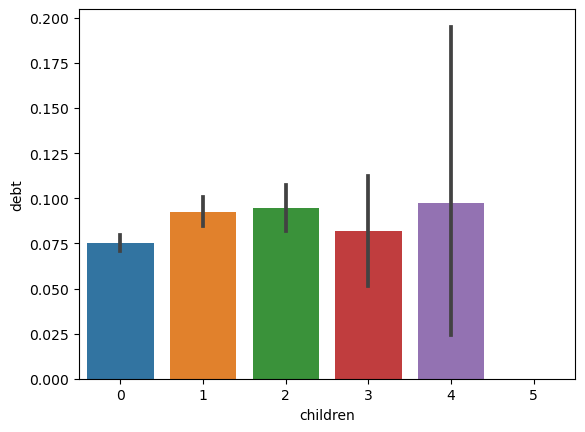

In [27]:
sns.barplot(data = data, x = 'children', y = 'debt')

data_pivot = data.pivot_table(index = ['children'],values = 'debt',aggfunc = {'count','sum'})
data_pivot = data_pivot.rename(columns = {'count':'total_of_clients','sum':'number_of_debtors'})
data_pivot['percent'] = round(data_pivot['number_of_debtors']/data_pivot['total_of_clients'],3)
data_pivot['percent'] *=100
print(data_pivot)


def child_category(children):
    if children == 0:
        return 'Нет детей'
    else:
        return 'Есть дети'
data['child_category'] = data['children'].apply(child_category)
child_data = data.pivot_table(index=['child_category'], values ='debt', aggfunc=['count','sum', 'mean'])
child_data.columns = ['Кол-во заемщиков', 'Кол-во просрочек', 'Доля просрочек']
child_data

**Вывод:** 
Бездетные чаще берут кредиты, но согласно графику и таблице реже задерживают выплаты (7.5%). Чем больше детей в семье тем они чаще задерживают выплаты хоть с 3мя детьми показатель и упал, но я думаю тут дело в малом количестве заёмщиков про людей с 4мя и 5ю детьми нельзя сказать ничего так как их слишком мало для статистики

### Проверяю есть ли зависимость между семейным положением и возвратом кредита в срок?

family_status
Не женат / не замужем    273
в разводе                 84
вдовец / вдова            63
гражданский брак         385
женат / замужем          927
Name: debt, dtype: int64
                       count_family  sum_family  percent
family_status                                           
Не женат / не замужем          2796         273      9.8
в разводе                      1189          84      7.1
вдовец / вдова                  951          63      6.6
гражданский брак               4134         385      9.3
женат / замужем               12261         927      7.6


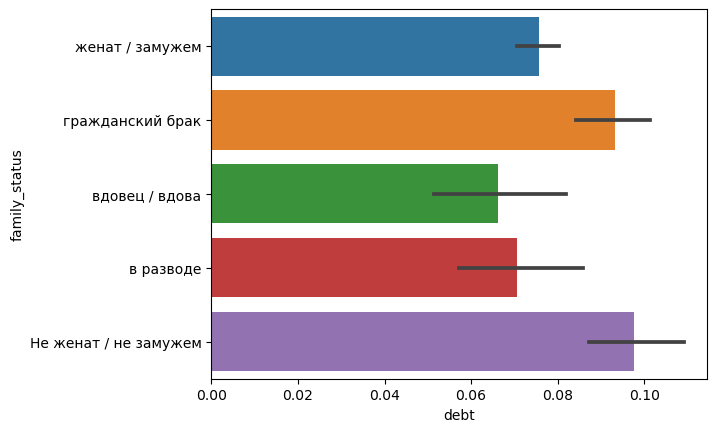

In [28]:
print(data.groupby('family_status')['debt'].sum())
sns.barplot(data = data, x = 'debt', y = 'family_status')
data_family = data.pivot_table(index = ['family_status'],values = 'debt',aggfunc = {'count','sum'})
data_family = data_family.rename(columns = {'count':'count_family','sum':'sum_family'})
data_family['percent'] = round(data_family['sum_family']/data_family['count_family'],3)
data_family['percent'] *=100
print(data_family.head())

**Вывод:** Не женатые и живущие в гражданском браке относятся более халатно Чем люди состоящие/состоявшие в браке так же женатых в разы больше средний показатель своевременных выплат более точен

### Проверяю есть ли зависимость между уровнем дохода и возвратом кредита в срок?

total_income_category
A       2
B     354
C    1353
D      21
E       2
Name: debt, dtype: int64


,count_income,sum_income,percent
total_income_category,,,
A,25,2,8.0
B,5014,354,7.1
C,15921,1353,8.5
D,349,21,6.0
E,22,2,9.1


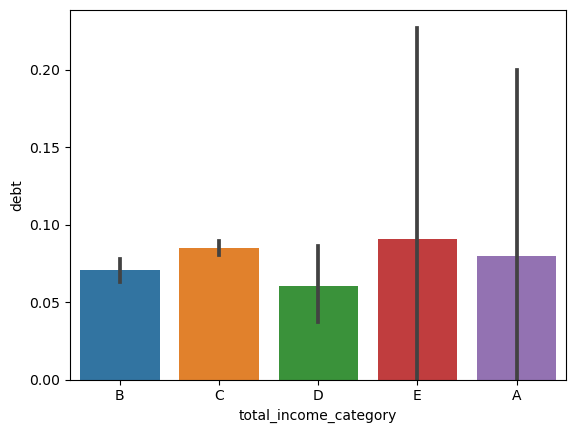

In [29]:
print(data.groupby('total_income_category')['debt'].sum())
sns.barplot(data = data, x = 'total_income_category', y = 'debt')

data_income = data.pivot_table(index = ['total_income_category'],values = 'debt',aggfunc = {'count','sum'})
data_income = data_income.rename(columns = {'count':'count_income','sum':'sum_income'})
data_income['percent'] = round(data_income['sum_income']/data_income['count_income'],3)
data_income['percent'] *=100
data_income

**Вывод:** Для категории A, E, D слишком мало данных для сравнения, но с категорией доходов уровня C людей большинство и они чаще не уплачивают вовремя

### Проверяю как разные цели кредита влияют на его возврат в срок?

purpose_category
операции с автомобилем      400
операции с недвижимостью    780
получение образования       369
проведение свадьбы          183
Name: debt, dtype: int64


,count,sum,percent
purpose_category,,,
операции с автомобилем,4279,400,9.3
операции с недвижимостью,10751,780,7.3
получение образования,3988,369,9.3
проведение свадьбы,2313,183,7.9


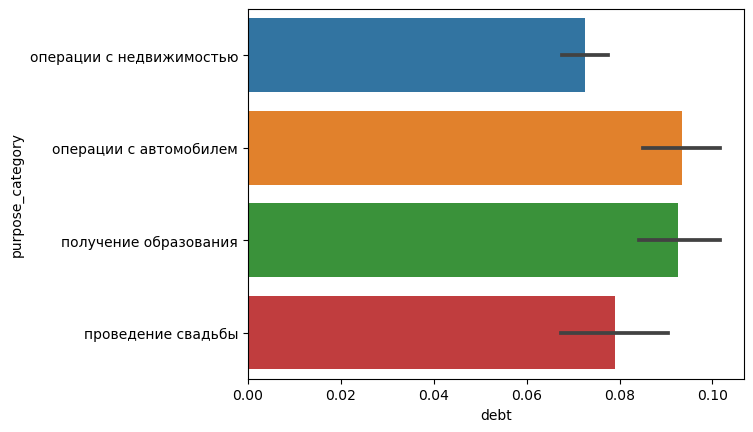

In [30]:
print(data.groupby('purpose_category')['debt'].sum())
sns.barplot(data = data, x = 'debt', y = 'purpose_category')
data_goal = data.pivot_table(index = ['purpose_category'],values = 'debt',aggfunc = {'count','sum'})
data_goal['percent'] = round(data_goal['sum']/data_goal['count'],3)
data_goal['percent'] *=100
data_goal

**Вывод:** Операции с автомобилем и образованием чаще других категорий не выплачиваются в срок могу предположить что недвижимость и свадьба являются более серьёзными решениями и принимаются более ответственными людьми

## 5 Общий вывод

Из полученной нами таблицы мы получили информацию о семейном положении, количестве детей, заработной плате и количествах задолжников клиентов. Работая с таблицей мы обнаружили одинаковые пропуски у ~10% клиентов в колонках в колонках доход и стаж. Из этого предположили что данные люди работают не официально и заполнили доход медийным значением для их социальной группы.
Так же мы сгруппировали данные по доходу клиентов, количеству детей, семейному положению и целям кредитора и выяснили что большинство это люди среднего класса бездетные, но женатые, со средним заработком от 50000 до 200000 чаще берут кредит на улучшение жилищных условий и у данной группы людей задержки замечены реже
О людях со слишком большими или слишком маленькими доходами мало чего можно сказать так как данной группы очень мало в таблицы, но могу предположить потому что у тех людей чья зарплата от 200000 до 1000000 и выше не очень нуждаются в обычных кредитах на машину, обучение свадьбу да и на недвижимость тоже. А у людей с зарплатой до 30000 нет возможностей выплачивать кредиты так как на эти деньги и без платежей по кредитам выжить надо как то.
Люди не женатые/в гражданском браке берут кредиты вероятно на образование и свадьбы и чаще задерживают выплаты
Так же согласно нашим исследованиям мы выяснили что количество детей влияет на своевременность погашения кредита и чем их больше(детей) тем чаще происходят задержки выплаты
Бездетные 7.5% С одним ребенком 9.2% С двумя детьми 9.5%
Желательно в дальнейшем уточнять доход у всех клиентов для получения более точных выводов, так же следить за данными так как часть данных записана не корректно(например отрицательные доходы)